# EDA

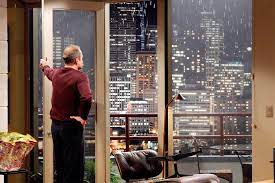

In [30]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Fictitious Client: Amy Williams 
### Clients Description:
    Seller      | Mafiosi, sells several central houses(top10%) over time, needs average outskirt houses over time to hide from the FBI

## Hypothesis:
* The grade affects the average house price
* The zipcode affects the prices as well
* The size of the house effects the price

In [31]:
# importing the data from the data folder
df = pd.read_csv("data/eda_joint_tables.csv")


In [32]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [ ]:
#dropping the columns that are not needed for the analysis
df.drop(columns=['id', 'id.1'],axis=1 ,inplace=True)
df.head()

In [ ]:
#turning date column into datetime objects
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [33]:
import missingno as msno

In [ ]:
#checking for missing values
df.isnull().sum()

date                0
price               0
house_id            0
id                  0
id.1                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

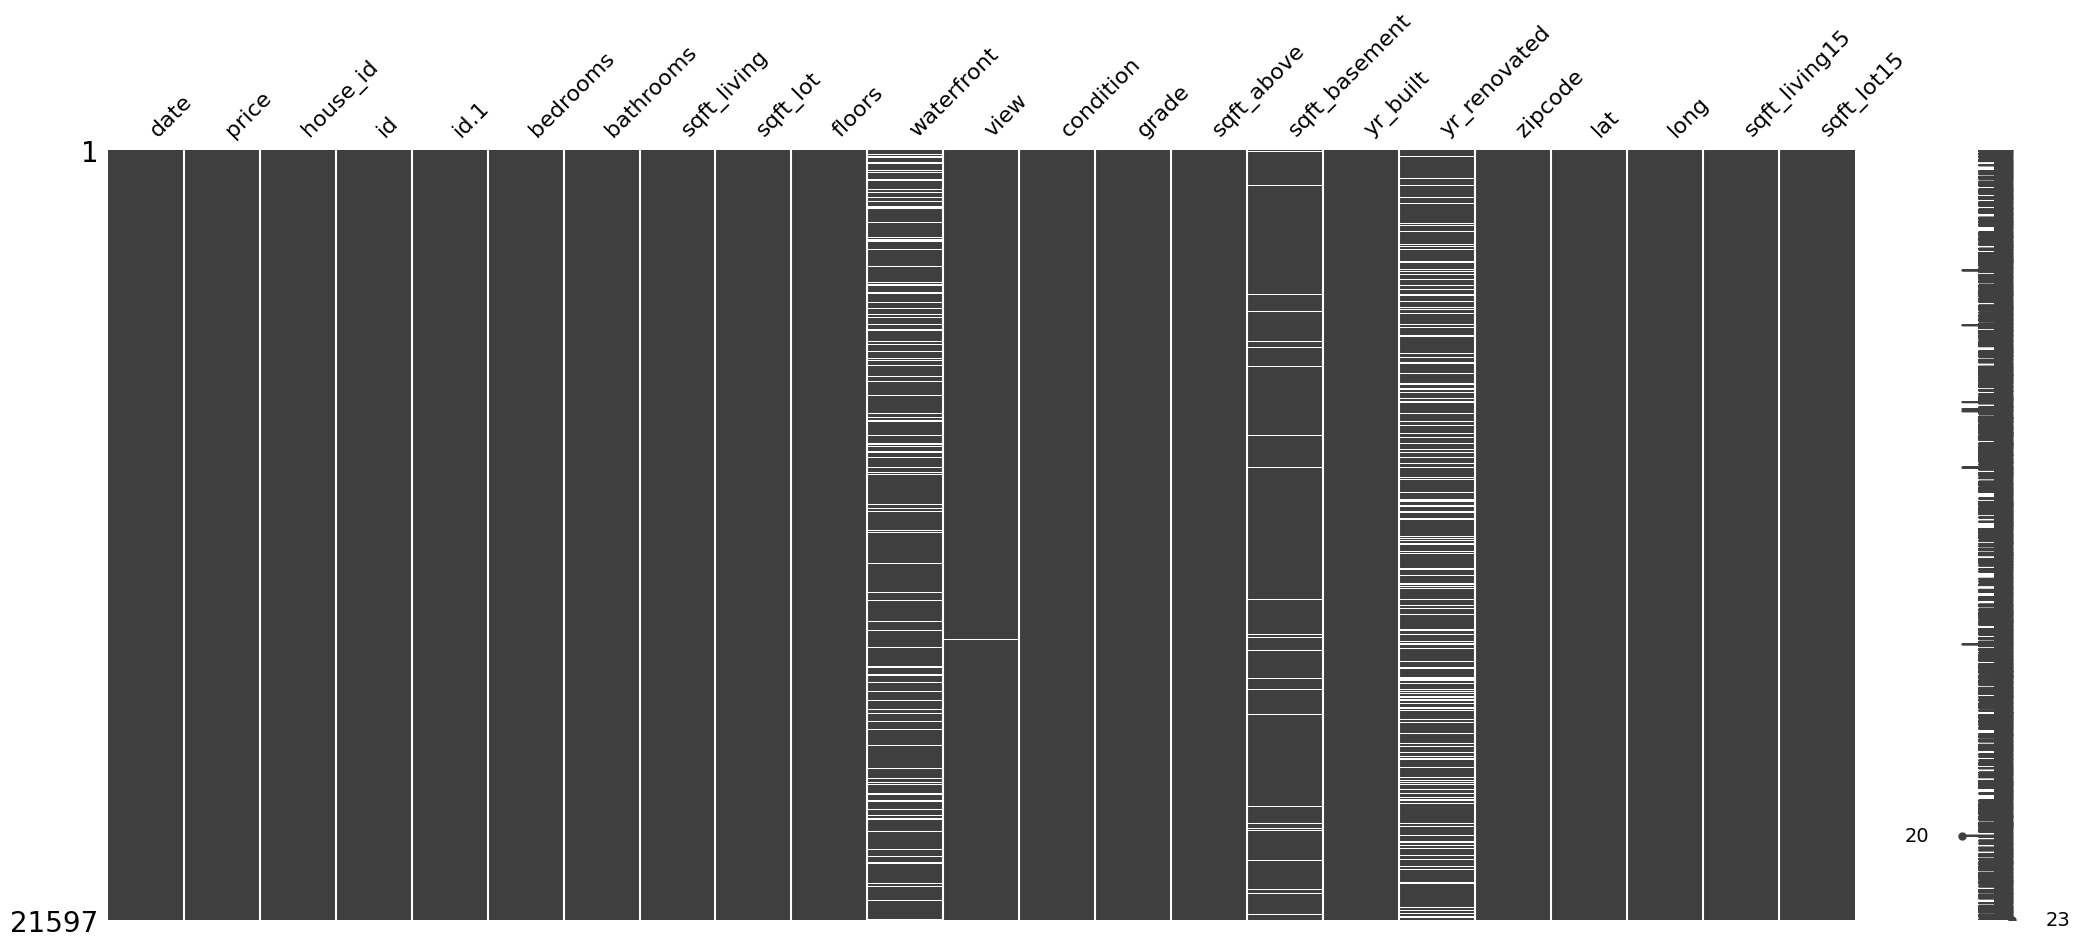

In [ ]:
#checking for patterns in missing values
msno.matrix(df)

In [ ]:
#checking for unique values in view column
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [45]:
#filling the missing values in view column with 0
df['view'].fillna(0, inplace=True)
df['view'].unique()

array([0., 3., 4., 2., 1.])

In [ ]:
#checking for unique values in waterfront column
df.waterfront.unique()

array([nan,  0.,  1.])

In [46]:
#filling the missing values in waterfront column with 0
df['waterfront'].fillna(0, inplace=True)
df.waterfront.unique()

array([0., 1.])

In [ ]:
#checking for unique values in yr_renovated column
df.yr_renovated.unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [47]:
#checking for unique values in sqft_basement column
df.sqft_basement.unique()

array([   0.,  400.,  910., 1530.,   nan,  730., 1700.,  300.,  970.,
        760.,  720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,
        588., 1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,
        500., 1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,
        710.,  840.,  380.,  770.,  480.,  570., 1490.,  620., 1250.,
       1270.,  120.,  650.,  180., 1130.,  450., 1640., 1460., 1020.,
       1030.,  750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,
        430.,  850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,
        580., 2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530.,
       1450., 1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,
        660., 1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,
        350.,  935., 1370.,  980., 1470.,  160.,  950.,   50.,  740.,
       1780., 1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,
        890., 1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800.,
       1120., 1810.,

In [49]:
#filling the missing values in sqft_basement column with 0
df['sqft_basement'].fillna(0, inplace=True)
df.sqft_basement.unique()  

array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

In [43]:
#replace nan with 0.00
df['yr_renovated'].fillna(0.00, inplace=True)

# divide by 10 and convert to int
df['yr_renovated'] = (df['yr_renovated']/10).astype(int)

# check the unique values of yr_renovated
df.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1992, 2013, 1994, 1978, 2005, 2003, 1984,
       1954, 2014, 2011, 1983, 1945, 1990, 1988, 1977, 1981, 1995, 2000,
       1999, 1998, 1970, 1989, 2004, 1986, 2007, 1987, 2006, 1985, 2001,
       1980, 1971, 1979, 1997, 1950, 1969, 1948, 2009, 2015, 1974, 2008,
       1968, 2012, 1963, 1951, 1962, 1953, 1993, 1996, 1955, 1982, 1956,
       1940, 1976, 1946, 1975, 1964, 1973, 1957, 1959, 1960, 1967, 1965,
       1934, 1972, 1944, 1958])

In [50]:
#checking for missing values again
df.isnull().sum()

date             0
price            0
house_id         0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Selling a House in Central Seattle

<BarContainer object of 5 artists>

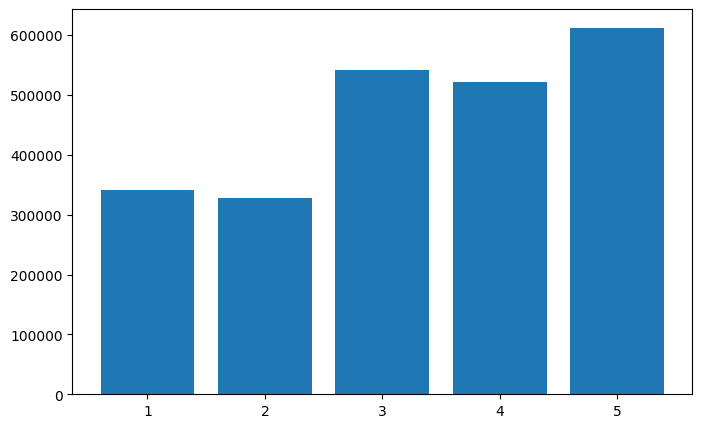

In [11]:
#testing ho the condition correlates with the price
test1 = df.groupby('condition', as_index=False).mean('price')
test1.head()
plt.bar(test1['condition'], test1['price'])

<BarContainer object of 11 artists>

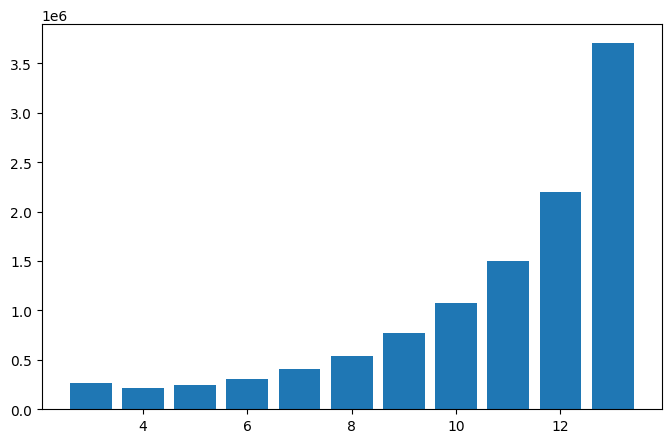

In [12]:
#testing how the grade correlates with the price
test2 = df.groupby('grade', as_index=False).mean('price')
plt.bar(test2['grade'], test2['price'])

This seems to prove the first hypotheses.

<BarContainer object of 70 artists>

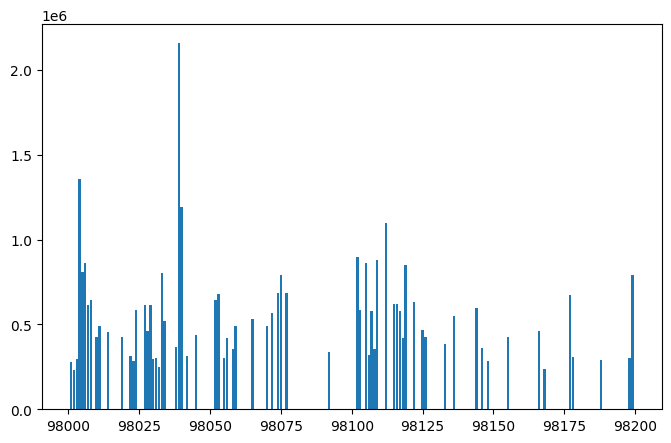

In [13]:
#testing how the zipcode correlates with the price
test3 = df.groupby('zipcode', as_index=False).mean('price')
plt.bar(test3['zipcode'], test3['price'])

This shows that the zip code does indeed affect the house sell prices, which would agree with the second hypotheses.

<BarContainer object of 1034 artists>

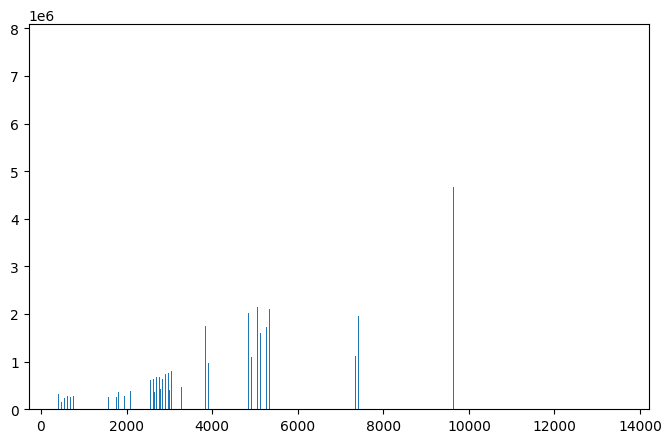

In [79]:
test4 = df.groupby('sqft_living', as_index=False).mean('price')
plt.bar(test4['sqft_living'], test4['price'])

This seems to agree with the third hypotheses.

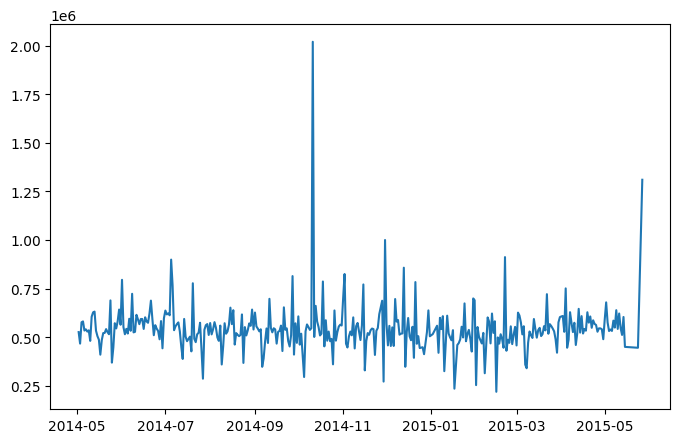

In [77]:

test5 = df.groupby('date', as_index=False).mean('price')
plt.plot(test5['date'], test4['price'])

In [74]:
#Creating a zoomable map of Washington state with the housing prices using Plotly
# importing the necessary libraries
import plotly.graph_objects as go
import plotly.express as px 
import pandas as pd
import json

# Load the GeoJSON file for Washington state
with open('data/washington.geojson', 'r') as f:
    washington_geojson = json.load(f)

# Ensure your DataFrame `df` has the necessary columns: 'long', 'lat', 'zipcode', and 'price'
# Example: df = pd.read_csv("data/eda_joint_tables.csv")

# Create the Plotly map
fig = px.scatter_mapbox(
    df,
    lat="lat",  # Latitude column
    lon="long",  # Longitude column
    color="zipcode",  # Color by zipcode
    size=None,  # Optional: size of points
    hover_name="price",  # Tooltip to show price
    mapbox_style="carto-positron",  # Map style
    zoom=7,  # Initial zoom level
    center={"lat": 47.5, "lon": -120.5},  # Center of Washington state
    title="Washington State Housing Prices"
)

# Add the GeoJSON layer for Washington state boundaries
fig.update_layout(
    mapbox=dict(
        layers=[
            {
                "source": washington_geojson,
                "type": "line",  # Boundary lines
                "color": "gray",
            }
        ]
    )
)

# Show the map
fig.show()

### Additional Information about Seattle and for the map
[Washington state map](https://github.com/glynnbird/usstatesgeojson/blob/master/washington.geojson)

[Seattle zipcodes](https://simplemaps.com/city/seattle/zips)

In [51]:
#Selecting zipcodes from the central part of Seattle
central_seattle_zipcodes = [98119, 98109, 98102, 98112, 98122, 98144, 98116]
central_seattle_zipcodes_df = df[df['zipcode'].isin(central_seattle_zipcodes)]
other_zipcodes_df = df[~df['zipcode'].isin(central_seattle_zipcodes)]


<BarContainer object of 2 artists>

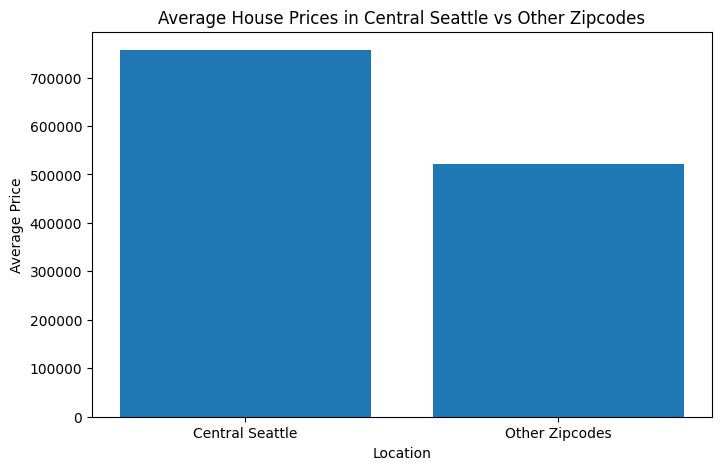

In [53]:
#comparing average house sell prices in central Seattle with the rest of the zipcodes
central_seattle_avg_price = central_seattle_zipcodes_df['price'].mean()
other_zipcodes_avg_price = other_zipcodes_df['price'].mean()

# Plotting the average prices
plt.title("Average House Prices in Central Seattle vs Other Zipcodes")
plt.ylabel("Average Price")
plt.xlabel("Location")
plt.bar(['Central Seattle', 'Other Zipcodes'], [central_seattle_avg_price, other_zipcodes_avg_price])

This agrees even more with the second hypotheses

In [ ]:
#obtaining informations about the central Seattle zipcodes
central_seattle_zipcodes_df['price'].describe()

count      1629.000
mean     756844.127
std      477567.723
min      130000.000
25%      478000.000
50%      625000.000
75%      860000.000
max     7700000.000
Name: price, dtype: float64

In [70]:
#obtaining the 90th percentile of the price column
x = int(central_seattle_zipcodes_df['price'].describe()['count']/10)-1

#obtaining the price at the 90th percentile of the price column
lower_cutoff = central_seattle_zipcodes_df.sort_values('price', ascending=False).iloc[x]['price']


In [87]:
#Selecting only the houses that are in the top 10% of the price column
highest_price_decile = central_seattle_zipcodes_df[central_seattle_zipcodes_df['price'] >= lower_cutoff]
highest_price_decile.shape
highest_price_decile.head()

#Selecting the other 90 % of houses
other_nine_deciles = central_seattle_zipcodes_df[central_seattle_zipcodes_df['price'] < lower_cutoff]

In [90]:
#exoloring the data
highest_price_decile.describe()


,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,163,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000,...,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000
mean,2014-10-14 04:42:41.963190272,1851901.840,3859140287.239,4.160,3.199,3766.025,7616.853,2.058,0.018,1.129,...,9.748,2927.742,822.331,1944.086,257.877,98116.405,47.623,-122.316,2922.025,6411.601
min,2014-05-02 00:00:00,1300000.000,148000475.000,2.000,1.000,1670.000,1880.000,1.000,0.000,0.000,...,7.000,1470.000,0.000,1900.000,0.000,98102.000,47.560,-122.409,1100.000,1378.000
25%,2014-07-03 00:00:00,1430000.000,1337800735.000,4.000,2.500,3020.000,4960.000,2.000,0.000,0.000,...,9.000,2360.000,345.000,1910.000,0.000,98112.000,47.619,-122.350,2360.000,4800.000
50%,2014-10-01 00:00:00,1630000.000,3232200085.000,4.000,3.250,3600.000,6480.000,2.000,0.000,0.000,...,10.000,2720.000,880.000,1927.000,0.000,98112.000,47.630,-122.303,2940.000,6000.000
75%,2015-01-17 12:00:00,2170000.000,5700003635.000,5.000,3.750,4270.000,8360.000,2.000,0.000,2.000,...,10.000,3365.000,1210.000,1979.500,0.000,98119.000,47.634,-122.287,3450.000,8000.500
max,2015-05-13 00:00:00,7700000.000,9831200520.000,8.000,8.000,12050.000,43838.000,3.500,1.000,4.000,...,13.000,8570.000,3480.000,2015.000,2014.000,98144.000,47.654,-122.279,4510.000,12620.000
std,NaN,682907.322,2704000049.492,1.030,0.875,1206.127,5273.678,0.439,0.135,1.475,...,1.020,934.000,594.673,39.042,672.653,10.840,0.020,0.036,739.984,2186.512


In [91]:
#comparing to the other 90 % of houses
other_nine_deciles.describe()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1466,1466.000,1466.000,1466.000,1466.000,1466.000,1466.000,1466.000,1466.000,1466.000,...,1466.000,1466.000,1466.000,1466.000,1466.000,1466.000,1466.000,1466.000,1466.000,1466.000
mean,2014-10-26 10:28:38.963164928,635088.051,4986961873.725,3.128,2.016,1814.559,3820.284,1.680,0.000,0.297,...,7.637,1448.448,355.408,1951.095,141.874,98121.822,47.606,-122.332,1740.539,3887.480
min,2014-05-02 00:00:00,130000.000,3600057.000,1.000,0.750,520.000,520.000,1.000,0.000,0.000,...,5.000,520.000,0.000,1900.000,0.000,98102.000,47.542,-122.415,780.000,824.000
25%,2014-07-17 00:00:00,455625.000,2025049010.750,2.000,1.500,1310.000,2091.500,1.000,0.000,0.000,...,7.000,1040.000,0.000,1915.000,0.000,98112.000,47.582,-122.371,1420.000,2602.250
50%,2014-10-14 00:00:00,599000.000,5016501902.500,3.000,2.000,1705.000,3960.000,1.500,0.000,0.000,...,8.000,1335.000,240.000,1938.000,0.000,98119.000,47.606,-122.312,1665.000,4000.000
75%,2015-02-12 00:00:00,760000.000,7578950527.500,4.000,2.500,2220.000,5000.000,2.000,0.000,0.000,...,8.000,1750.000,640.000,2001.000,0.000,98122.000,47.631,-122.299,1970.000,5000.000
max,2015-05-14 00:00:00,1290000.000,9839301165.000,9.000,7.500,4610.000,34527.000,3.000,0.000,4.000,...,11.000,4050.000,2060.000,2015.000,2015.000,98144.000,47.654,-122.279,4950.000,13680.000
std,NaN,231561.413,3131656675.094,0.981,0.752,679.429,2150.784,0.566,0.000,0.825,...,0.909,528.385,392.099,40.719,513.610,12.860,0.027,0.040,461.995,1661.737


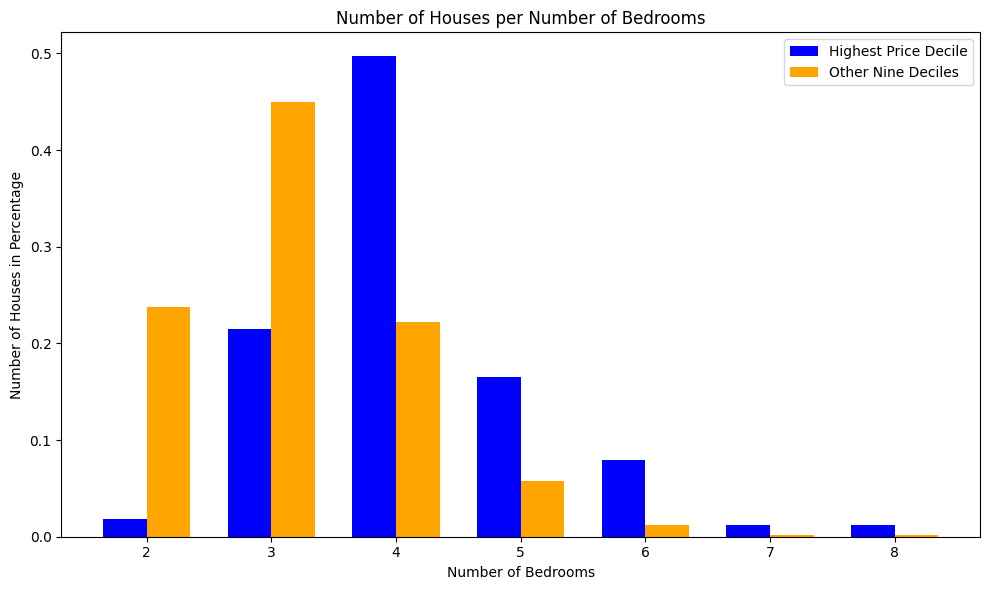

In [95]:
#number of houses per number of bedrooms in the house
num_per_bedrooms_highest = highest_price_decile.groupby('bedrooms').size().reset_index(name='counts')
num_per_bedrooms_other = other_nine_deciles.groupby('bedrooms').size().reset_index(name='counts')

# rescaling the counts to percentages
num_per_bedrooms_highest['counts'] = num_per_bedrooms_highest['counts'] / num_per_bedrooms_highest['counts'].sum()
num_per_bedrooms_other['counts'] = num_per_bedrooms_other['counts'] / num_per_bedrooms_other['counts'].sum()

#merging the two dataframes
merged_data_bedrooms = pd.merge(num_per_bedrooms_highest, num_per_bedrooms_other, on='bedrooms', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
bedrooms = merged_data_bedrooms['bedrooms']
counts_highest = merged_data_bedrooms['counts_highest']
counts_other = merged_data_bedrooms['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(bedrooms))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')

# Adding labels, title, and legend
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses in Percentage')
plt.title('Number of Houses per Number of Bedrooms')
plt.xticks(x, bedrooms.astype(int))  # Set x-axis labels to integer values of bedrooms
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


Most of the houses in the highest sales price decile have four or more bedrooms.

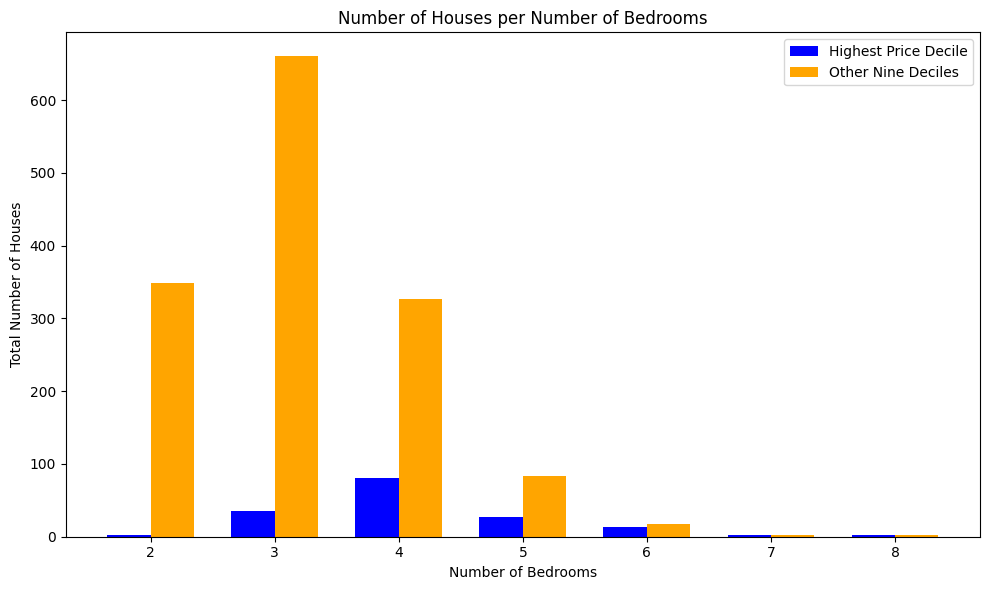

In [124]:
#number of houses per number of bedrooms in the house
num_per_bedrooms_highest = highest_price_decile.groupby('bedrooms').size().reset_index(name='counts')
num_per_bedrooms_other = other_nine_deciles.groupby('bedrooms').size().reset_index(name='counts')

#merging the two dataframes
merged_data_bedrooms = pd.merge(num_per_bedrooms_highest, num_per_bedrooms_other, on='bedrooms', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
bedrooms = merged_data_bedrooms['bedrooms']
counts_highest = merged_data_bedrooms['counts_highest']
counts_other = merged_data_bedrooms['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(bedrooms))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')

# Adding labels, title, and legend
plt.xlabel('Number of Bedrooms')
plt.ylabel('Total Number of Houses')
plt.title('Number of Houses per Number of Bedrooms')
plt.xticks(x, bedrooms.astype(int))  # Set x-axis labels to integer values of bedrooms
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

If the house has six or more bedrooms chances are about 50 % for the house to be in the top 10 % of the sales price.

<BarContainer object of 7 artists>

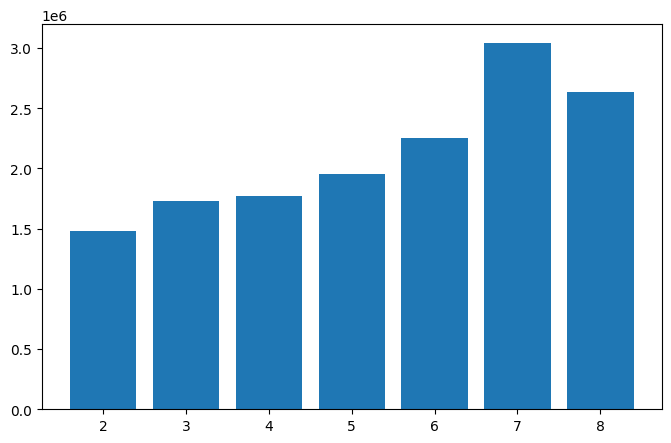

In [84]:
#average price per number of bedrooms in the house
avg_price_bedrooms = highest_price_decile.groupby('bedrooms', as_index=False).mean('price')
plt.bar(avg_price_bedrooms['bedrooms'], avg_price_bedrooms['price'])

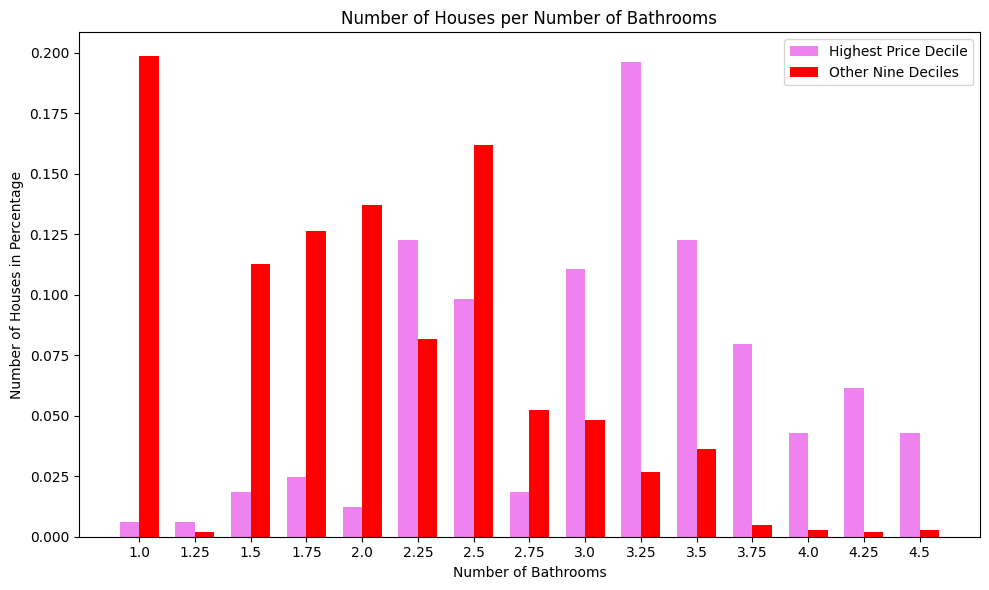

In [ ]:
#number of houses per number of bathrooms in the house
num_per_bathrooms_highest = highest_price_decile.groupby('bathrooms').size().reset_index(name='counts')
num_per_bathrooms_other = other_nine_deciles.groupby('bathrooms').size().reset_index(name='counts')

# rescaling the counts to percentages
num_per_bathrooms_highest['counts'] = num_per_bathrooms_highest['counts'] / num_per_bathrooms_highest['counts'].sum()
num_per_bathrooms_other['counts'] = num_per_bathrooms_other['counts'] / num_per_bathrooms_other['counts'].sum()

#merging the two dataframes
merged_data_bathrooms = pd.merge(num_per_bathrooms_highest, num_per_bathrooms_other, on='bathrooms', suffixes=('_highest', '_other'))\
.fillna(0)

# Extracting data for plotting
bathrooms = merged_data_bathrooms['bathrooms']
counts_highest = merged_data_bathrooms['counts_highest']
counts_other = merged_data_bathrooms['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(bathrooms))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='violet')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='red')

# Adding labels, title, and legend
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses in Percentage')
plt.title('Number of Houses per Number of Bathrooms')
plt.xticks(x, bathrooms.astype(float))  # Set x-axis labels to float values of bathrooms
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Most of the houses in the highest sales price decile have three or more bathrooms.

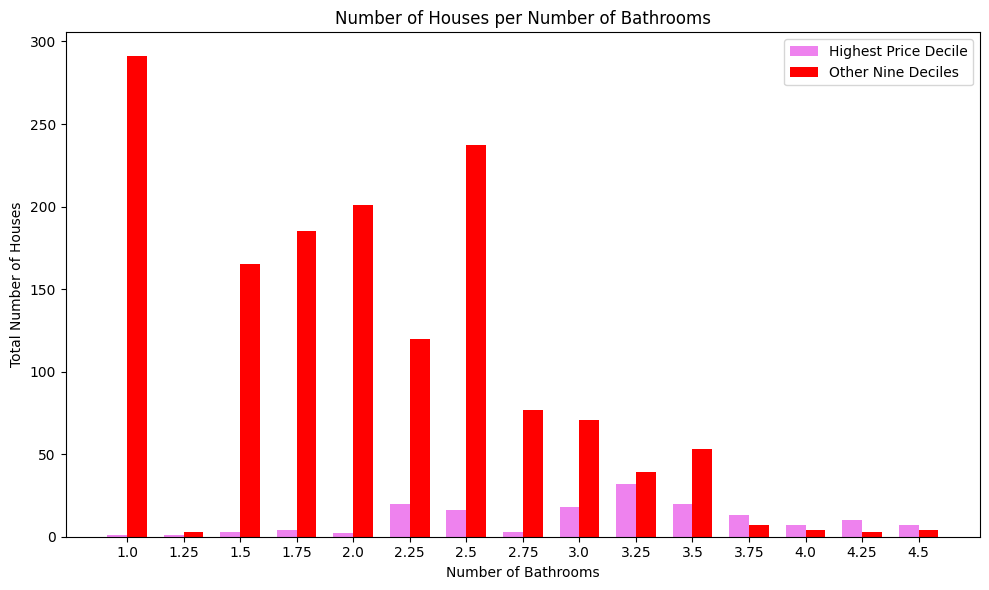

In [123]:
#number of houses per number of bathrooms in the house
num_per_bathrooms_highest = highest_price_decile.groupby('bathrooms').size().reset_index(name='counts')
num_per_bathrooms_other = other_nine_deciles.groupby('bathrooms').size().reset_index(name='counts')

#merging the two dataframes
merged_data_bathrooms = pd.merge(num_per_bathrooms_highest, num_per_bathrooms_other, on='bathrooms', suffixes=('_highest', '_other'))\
.fillna(0)

# Extracting data for plotting
bathrooms = merged_data_bathrooms['bathrooms']
counts_highest = merged_data_bathrooms['counts_highest']
counts_other = merged_data_bathrooms['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(bathrooms))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='violet')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='red')

# Adding labels, title, and legend
plt.xlabel('Number of Bathrooms')
plt.ylabel('Total Number of Houses')
plt.title('Number of Houses per Number of Bathrooms')
plt.xticks(x, bathrooms.astype(float))  # Set x-axis labels to float values of bathrooms
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

If the house has 3.75 or more bathrooms it's likely in the highest 10 % of sales price.

<BarContainer object of 17 artists>

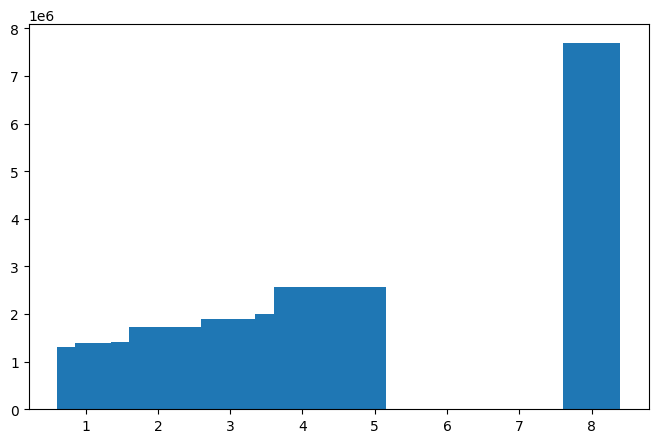

In [85]:
#average price per number of bathrooms in the house
avg_price_bathrooms = highest_price_decile.groupby('bathrooms', as_index=False).mean('price')
plt.bar(avg_price_bathrooms['bathrooms'], avg_price_bathrooms['price'])

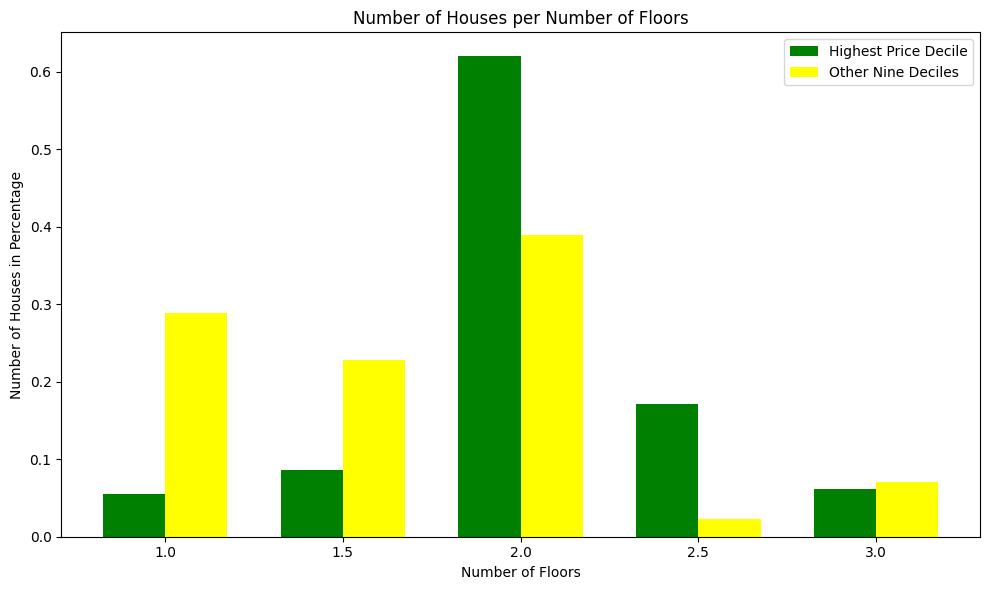

In [100]:
#number of houses per number of floors in the house
num_per_floors_highest = highest_price_decile.groupby('floors').size().reset_index(name='counts')
num_per_floors_other = other_nine_deciles.groupby('floors').size().reset_index(name='counts')

#rescaling the counts to percentages
num_per_floors_highest['counts'] = num_per_floors_highest['counts'] / num_per_floors_highest['counts'].sum()
num_per_floors_other['counts'] = num_per_floors_other['counts'] / num_per_floors_other['counts'].sum()

#merging the two dataframes
merged_data_floors = pd.merge(num_per_floors_highest, num_per_floors_other, on = 'floors', suffixes=('_highest', '_other')).fillna(0)

#extracting data for plotting
floors = merged_data_floors['floors']
counts_highest = merged_data_floors['counts_highest']
counts_other = merged_data_floors['counts_other']

#setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(floors))

#creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width = bar_width, label = 'Highest Price Decile' , color = 'green')
plt.bar(x + bar_width / 2, counts_other, width = bar_width, label = 'Other Nine Deciles' , color = 'yellow')
#adding labels, title, and legend
plt.xlabel('Number of Floors')
plt.ylabel('Number of Houses in Percentage')
plt.title('Number of Houses per Number of Floors')
plt.xticks(x, floors.astype(float))  # Set x-axis labels to float values of floors
plt.legend()

#display the plot   
plt.tight_layout()
plt.show()

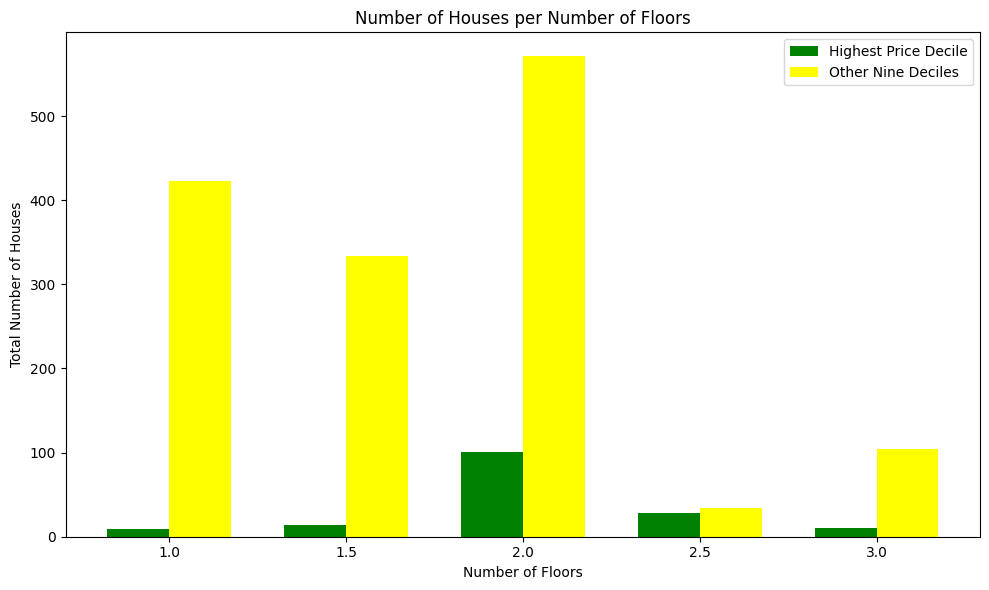

In [122]:
#number of houses per number of floors in the house
num_per_floors_highest = highest_price_decile.groupby('floors').size().reset_index(name='counts')
num_per_floors_other = other_nine_deciles.groupby('floors').size().reset_index(name='counts')

#merging the two dataframes
merged_data_floors = pd.merge(num_per_floors_highest, num_per_floors_other, on = 'floors', suffixes=('_highest', '_other')).fillna(0)

#extracting data for plotting
floors = merged_data_floors['floors']
counts_highest = merged_data_floors['counts_highest']
counts_other = merged_data_floors['counts_other']

#setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(floors))

#creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width = bar_width, label = 'Highest Price Decile' , color = 'green')
plt.bar(x + bar_width / 2, counts_other, width = bar_width, label = 'Other Nine Deciles' , color = 'yellow')
#adding labels, title, and legend
plt.xlabel('Number of Floors')
plt.ylabel('Total Number of Houses')
plt.title('Number of Houses per Number of Floors')
plt.xticks(x, floors.astype(float))  # Set x-axis labels to float values of floors
plt.legend()

#display the plot   
plt.tight_layout()
plt.show()

This is unconclusive.

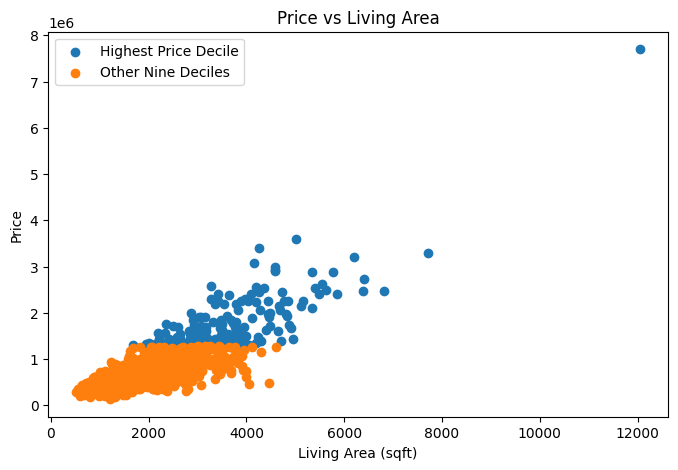

In [102]:
plt.scatter(highest_price_decile['sqft_living'], highest_price_decile['price'])
plt.scatter(other_nine_deciles['sqft_living'], other_nine_deciles['price'])
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.title('Price vs Living Area')
plt.legend(['Highest Price Decile', 'Other Nine Deciles'])  


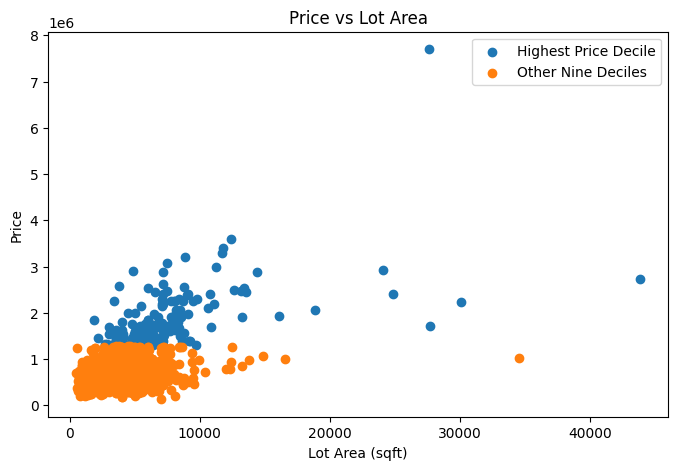

In [156]:
plt.scatter(highest_price_decile['sqft_lot'], highest_price_decile['price'])
plt.scatter(other_nine_deciles['sqft_lot'], other_nine_deciles['price'])
plt.xlabel('Lot Area (sqft)')
plt.ylabel('Price')
plt.title('Price vs Lot Area')
plt.legend(['Highest Price Decile', 'Other Nine Deciles'])  

In [103]:
other_nine_deciles.sort_values('sqft_living', ascending=False).head(10)

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10257,2014-09-26,1250000.000,669000350,3.000,3.000,4610.000,8400.000,2.000,0.000,2.000,...,8,2790.000,1820.000,1947,1999,98144,47.585,-122.292,2160.000,5000.000
21356,2014-05-20,490000.000,6169901185,5.000,3.500,4460.000,2975.000,3.000,0.000,2.000,...,10,3280.000,0.000,2015,0,98119,47.631,-122.370,2490.000,4231.000
13943,2014-11-12,1160000.000,8805900065,5.000,3.250,4290.000,7019.000,2.500,0.000,0.000,...,10,3590.000,700.000,1927,0,98112,47.644,-122.302,1920.000,4000.000
8141,2014-12-17,1250000.000,9273200115,4.000,2.750,4120.000,12500.000,1.000,0.000,4.000,...,8,2060.000,2060.000,1947,0,98116,47.591,-122.385,3680.000,5000.000
8537,2014-08-11,450000.000,424049043,9.000,7.500,4050.000,6504.000,2.000,0.000,0.000,...,7,4050.000,0.000,1996,0,98144,47.592,-122.301,1448.000,3866.000
11966,2014-09-24,739000.000,7228501805,6.000,4.500,4000.000,7500.000,2.000,0.000,0.000,...,7,4000.000,0.000,1978,0,98122,47.615,-122.306,1380.000,6298.000
16917,2014-06-02,610000.000,5016002275,5.000,2.500,3990.000,3839.000,1.000,0.000,0.000,...,8,1990.000,2000.000,1962,0,98112,47.624,-122.299,2090.000,5000.000
10337,2014-11-10,1200000.000,8712100435,4.000,2.500,3940.000,4407.000,2.000,0.000,0.000,...,8,2620.000,1320.000,1921,0,98112,47.637,-122.299,1790.000,4407.000
12803,2014-12-08,760000.000,5700000180,5.000,2.000,3920.000,5250.000,1.500,0.000,0.000,...,7,2560.000,1360.000,1910,0,98144,47.580,-122.294,1830.000,4240.000
218,2014-08-28,1070000.000,1250202145,2.000,2.250,3900.000,14864.000,1.000,0.000,3.000,...,8,1950.000,1950.000,1947,0,98144,47.588,-122.291,2580.000,5184.000


According to this data the house will be under the highest 10 % of sales price, if the living area is bigger than 4610 sqft.

([<matplotlib.axis.XTick at 0x19a2b1f67d0>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

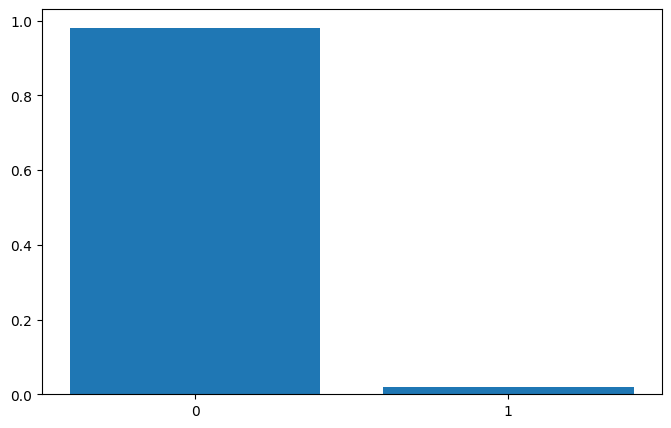

In [110]:
waterfront = highest_price_decile.groupby('waterfront').size().reset_index(name='counts')
waterfront['counts'] = waterfront['counts'] / waterfront['counts'].sum()

x = np.arange(len(waterfront['waterfront']))

plt.bar(waterfront['waterfront'], waterfront['counts'])
plt.xticks(x, waterfront['waterfront'].astype(int))

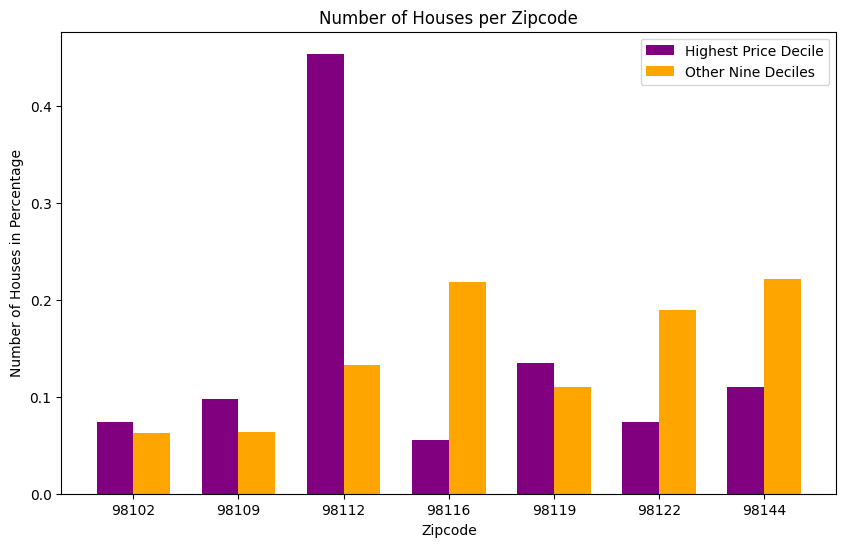

In [ ]:
zip_center_highest = highest_price_decile.groupby('zipcode').size().reset_index(name='counts')
zip_center_others = other_nine_deciles.groupby('zipcode').size().reset_index(name='counts')

#rescaling the counts to percentages
zip_center_highest['counts'] = zip_center_highest['counts'] / zip_center_highest['counts'].sum()
zip_center_others['counts'] = zip_center_others['counts'] / zip_center_others['counts'].sum()

#merging the two dataframes
merged_data_zip = pd.merge(zip_center_highest, zip_center_others, on='zipcode', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
zipcodes = merged_data_zip['zipcode']
counts_highest = merged_data_zip['counts_highest']
counts_other = merged_data_zip['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(zipcodes))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='purple')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('Zipcode')
plt.ylabel('Number of Houses in Percentage')
plt.title('Number of Houses per Zipcode')
plt.xticks(x, zipcodes.astype(int))  # Set x-axis labels to integer values of zipcodes
plt.legend()


Most of the high selling houses are located in the 98112 zipcode area.

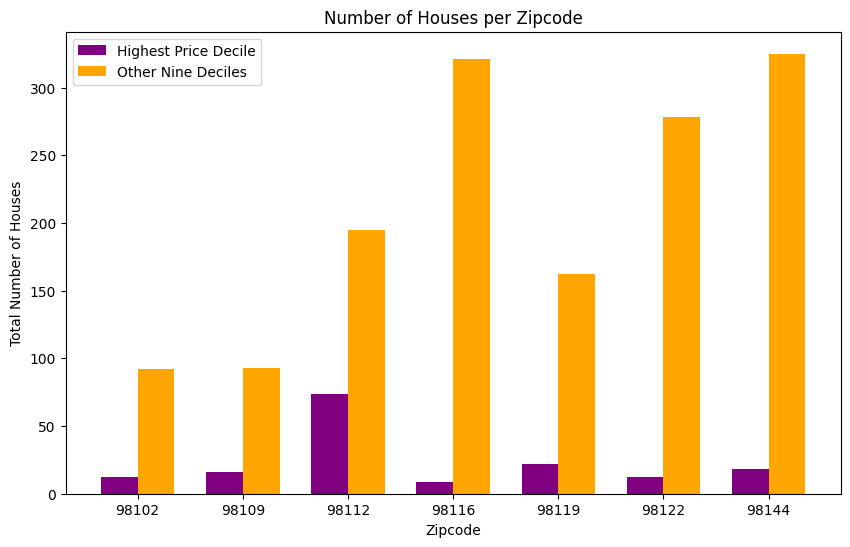

In [117]:
zip_center_highest = highest_price_decile.groupby('zipcode').size().reset_index(name='counts')
zip_center_others = other_nine_deciles.groupby('zipcode').size().reset_index(name='counts')

#merging the two dataframes
merged_data_zip = pd.merge(zip_center_highest, zip_center_others, on='zipcode', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
zipcodes = merged_data_zip['zipcode']
counts_highest = merged_data_zip['counts_highest']
counts_other = merged_data_zip['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(zipcodes))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='purple')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('Zipcode')
plt.ylabel('Total Number of Houses')
plt.title('Number of Houses per Zipcode')
plt.xticks(x, zipcodes.astype(int))  # Set x-axis labels to integer values of zipcodes
plt.legend()

Still the majority of houses in the 98112 zipcode area are not among the highest selling houses.
However more than a third of all houses sold in this area have scored a very high selling price.

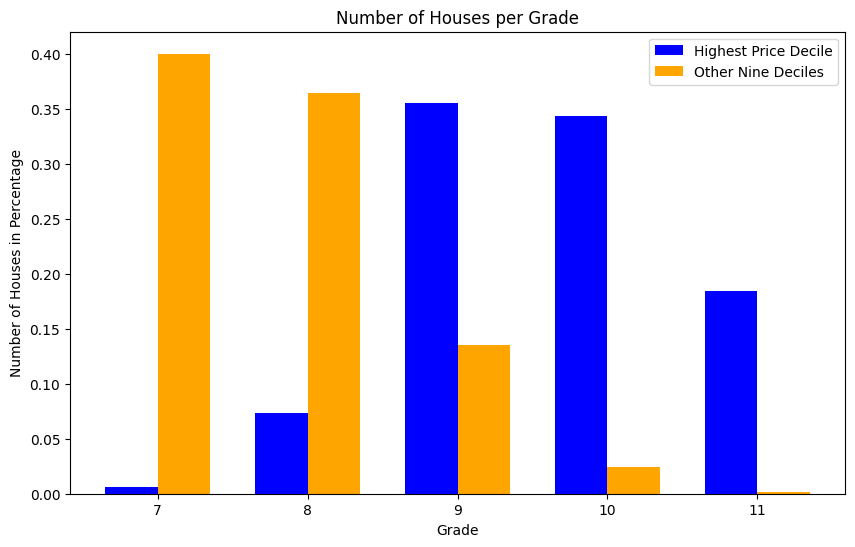

In [120]:
grades_highest = highest_price_decile.groupby('grade').size().reset_index(name='counts')
grades_other = other_nine_deciles.groupby('grade').size().reset_index(name='counts')

#rescaling the counts to percentages
grades_highest['counts'] = grades_highest['counts'] / grades_highest['counts'].sum()
grades_other['counts'] = grades_other['counts'] / grades_other['counts'].sum()

#merging the two dataframes
merged_data_grades = pd.merge(grades_highest, grades_other, on='grade', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
grades = merged_data_grades['grade']
counts_highest = merged_data_grades['counts_highest']
counts_other = merged_data_grades['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(grades))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('Grade')
plt.ylabel('Number of Houses in Percentage')
plt.title('Number of Houses per Grade')
plt.xticks(x, grades.astype(int))  # Set x-axis labels to integer values of conditions
plt.legend()


Most of the higher selling houses had a grade of nine or ten, while the majority of the lower selling houses have grades seven or eight.

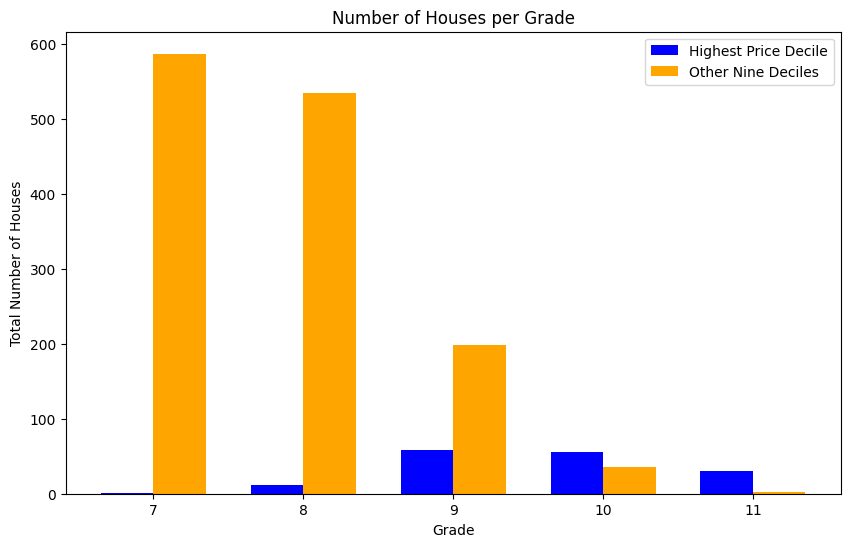

In [121]:
grades_highest = highest_price_decile.groupby('grade').size().reset_index(name='counts')
grades_other = other_nine_deciles.groupby('grade').size().reset_index(name='counts')

#merging the two dataframes
merged_data_grades = pd.merge(grades_highest, grades_other, on='grade', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
grades = merged_data_grades['grade']
counts_highest = merged_data_grades['counts_highest']
counts_other = merged_data_grades['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(grades))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('Grade')
plt.ylabel('Total Number of Houses')
plt.title('Number of Houses per Grade')
plt.xticks(x, grades.astype(int))  # Set x-axis labels to integer values of conditions
plt.legend()

A house is more likely to be among the higher selling ones, if the grade of the house is a ten or 11.

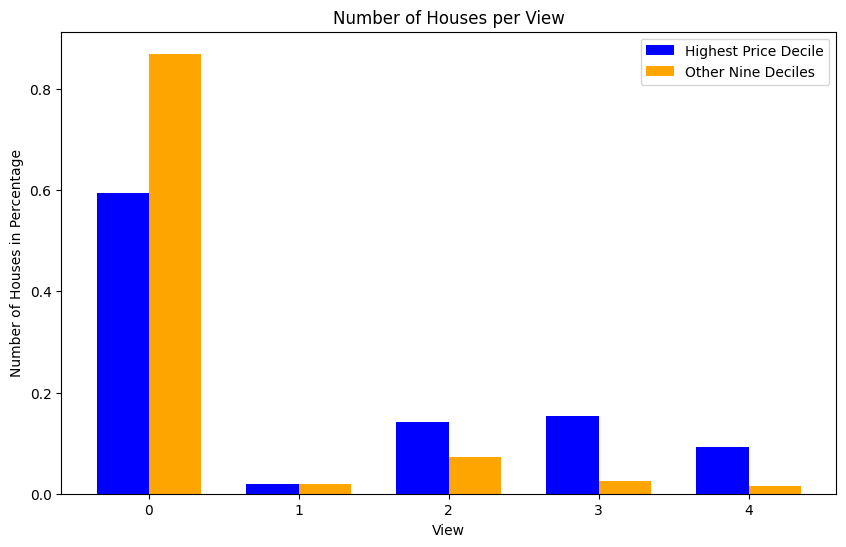

In [125]:
views_highest = highest_price_decile.groupby('view').size().reset_index(name='counts')
views_other = other_nine_deciles.groupby('view').size().reset_index(name='counts')

#rescaling the counts to percentages
views_highest['counts'] = views_highest['counts'] / views_highest['counts'].sum()
views_other['counts'] = views_other['counts'] / views_other['counts'].sum()

#merging the two dataframes
merged_data_views = pd.merge(views_highest, views_other, on='view', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
views = merged_data_views['view']
counts_highest = merged_data_views['counts_highest']
counts_other = merged_data_views['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(views))   

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('View')
plt.ylabel('Number of Houses in Percentage')
plt.title('Number of Houses per View')
plt.xticks(x, views.astype(int))  # Set x-axis labels to integer values of conditions
plt.legend()


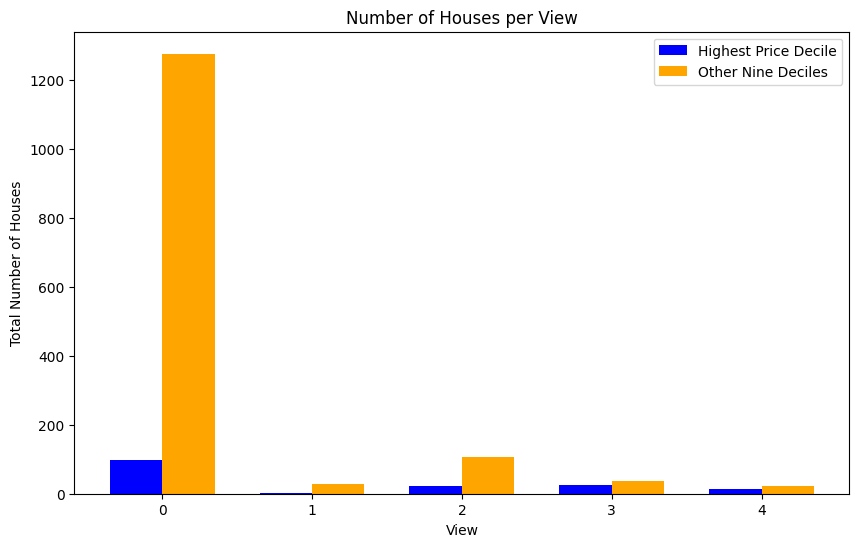

In [126]:
views_highest = highest_price_decile.groupby('view').size().reset_index(name='counts')
views_other = other_nine_deciles.groupby('view').size().reset_index(name='counts')

#merging the two dataframes
merged_data_views = pd.merge(views_highest, views_other, on='view', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
views = merged_data_views['view']
counts_highest = merged_data_views['counts_highest']
counts_other = merged_data_views['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(views))   

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('View')
plt.ylabel('Total Number of Houses')
plt.title('Number of Houses per View')
plt.xticks(x, views.astype(int))  # Set x-axis labels to integer values of conditions
plt.legend()

The view does not seem to affect the price that much.

In [143]:
#selecting houses that have been renovated
renovated_heighest = highest_price_decile[highest_price_decile['yr_renovated'] != 0]
renovated_other = other_nine_deciles[other_nine_deciles['yr_renovated'] != 0]

#selecting houses that have not been renovated
unrenovated_highest = highest_price_decile[highest_price_decile['yr_renovated'] == 0]
unrenovated_other = other_nine_deciles[other_nine_deciles['yr_renovated'] == 0]

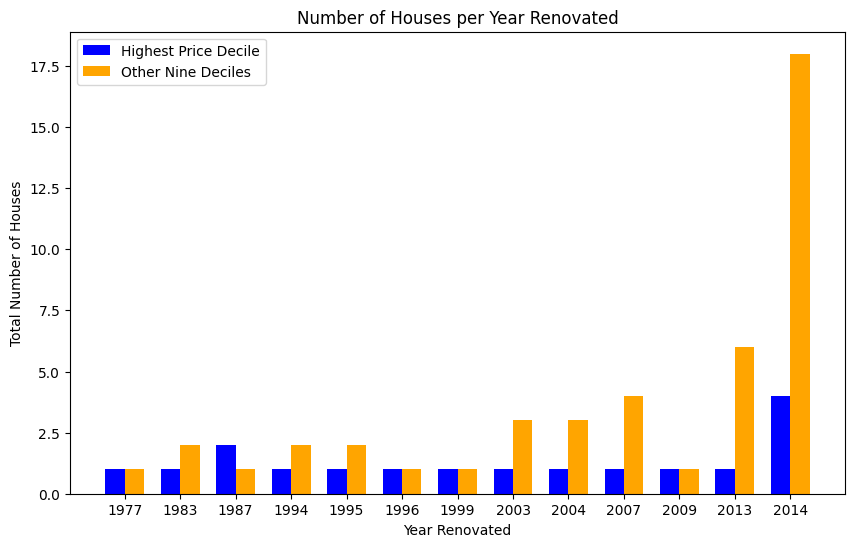

In [133]:

#number of houses per year renovated in the house
year_renovated_highest = renovated_heighest.groupby('yr_renovated').size().reset_index(name='counts')    
year_renovated_other = renovated_other.groupby('yr_renovated').size().reset_index(name='counts')


#merging the two dataframes
merged_data_renovated = pd.merge(year_renovated_highest, year_renovated_other, on='yr_renovated', suffixes=('_highest', '_other')).fillna(0)


# Extracting data for plotting
yr_renovated = merged_data_renovated['yr_renovated']
counts_highest = merged_data_renovated['counts_highest']
counts_other = merged_data_renovated['counts_other']

# Setting up the bar width and positions

bar_width = 0.35
x = np.arange(len(yr_renovated))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('Year Renovated')
plt.ylabel('Total Number of Houses')
plt.title('Number of Houses per Year Renovated')
plt.xticks(x, yr_renovated.astype(int))  # Set x-axis labels to integer values of conditions
plt.legend()



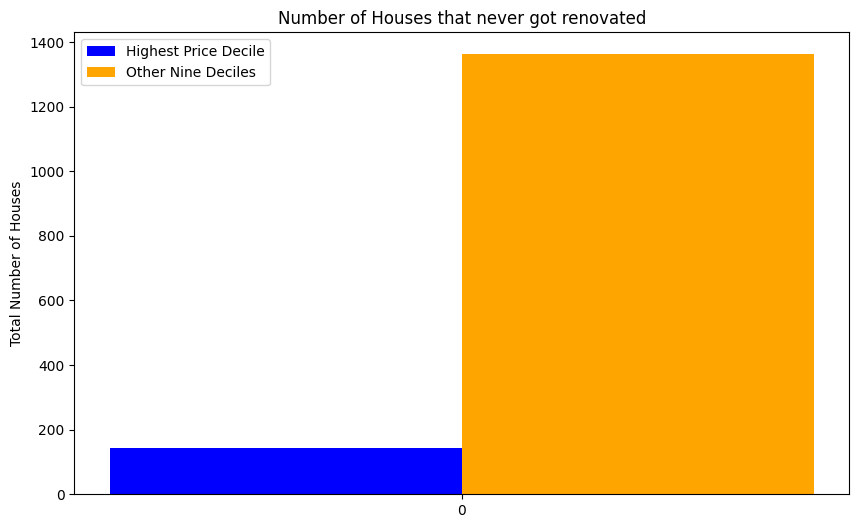

In [132]:
year_renovated_highest = unrenovated_highest.groupby('yr_renovated').size().reset_index(name='counts')
year_renovated_other = unrenovated_other.groupby('yr_renovated').size().reset_index(name='counts')

#merging the two dataframes
merged_data_renovated = pd.merge(year_renovated_highest, year_renovated_other, on='yr_renovated', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
renovated = merged_data_renovated['yr_renovated']
counts_highest = merged_data_renovated['counts_highest']
counts_other = merged_data_renovated['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(renovated))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('')
plt.ylabel('Total Number of Houses')
plt.title('Number of Houses that never got renovated')
plt.xticks(x, renovated.astype(int))  # Set x-axis labels to integer values of conditions
plt.legend()

In [151]:
year_renovated_highest = renovated_heighest.groupby('yr_renovated').size().reset_index(name='counts')    
year_renovated_other = renovated_other.groupby('yr_renovated').size().reset_index(name='counts')

never_renovated_highest = unrenovated_highest.groupby('yr_renovated').size().reset_index(name='counts')
never_renovated_other = unrenovated_other.groupby('yr_renovated').size().reset_index(name='counts')


#rescaling the counts to percentages
year_renovated_highest['counts'] = year_renovated_highest['counts'] / highest_price_decile.shape[0]
year_renovated_other['counts'] = year_renovated_other['counts'] / other_nine_deciles.shape[0]

never_renovated_highest['counts'] = never_renovated_highest['counts'] / highest_price_decile.shape[0]
never_renovated_other['counts'] = never_renovated_other['counts'] / other_nine_deciles.shape[0]  

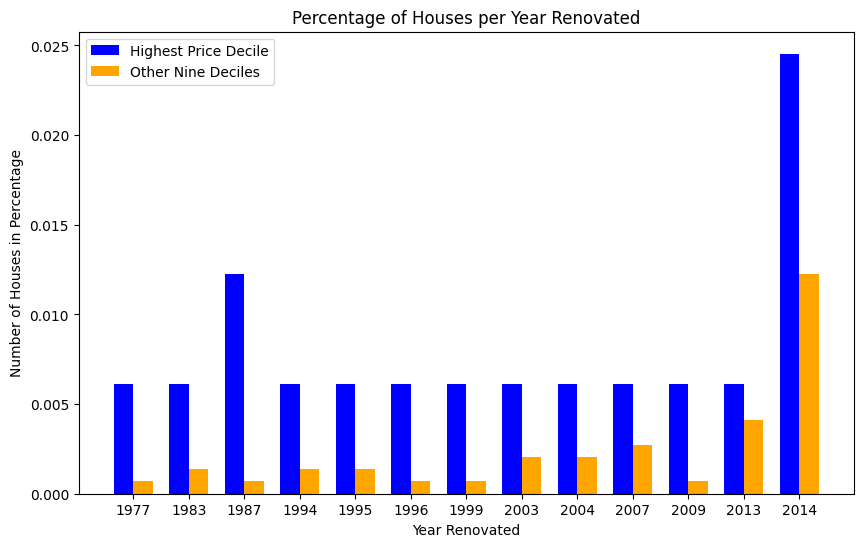

In [154]:
#merging the two dataframes
merged_data_renovated = pd.merge(year_renovated_highest, year_renovated_other, on='yr_renovated', suffixes=('_highest', '_other')).fillna(0)


# Extracting data for plotting
yr_renovated = merged_data_renovated['yr_renovated']
counts_highest = merged_data_renovated['counts_highest']
counts_other = merged_data_renovated['counts_other']

# Setting up the bar width and positions

bar_width = 0.35
x = np.arange(len(yr_renovated))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('Year Renovated')
plt.ylabel('Number of Houses in Percentage')
plt.title('Percentage of Houses per Year Renovated')
plt.xticks(x, yr_renovated.astype(int))  # Set x-axis labels to integer values of conditions
plt.legend()

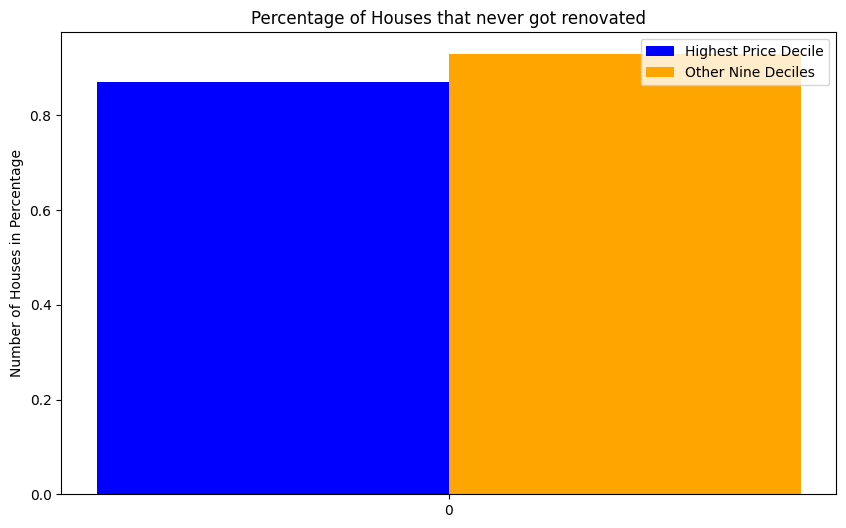

In [155]:
#merging the two dataframes
merged_data_renovated = pd.merge(never_renovated_highest, never_renovated_other, on='yr_renovated', suffixes=('_highest', '_other')).fillna(0)

# Extracting data for plotting
renovated = merged_data_renovated['yr_renovated']
counts_highest = merged_data_renovated['counts_highest']
counts_other = merged_data_renovated['counts_other']

# Setting up the bar width and positions
bar_width = 0.35
x = np.arange(len(renovated))

# Creating the side-by-side bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width / 2, counts_highest, width=bar_width, label='Highest Price Decile', color='blue')
plt.bar(x + bar_width / 2, counts_other, width=bar_width, label='Other Nine Deciles', color='orange')
# Adding labels, title, and legend
plt.xlabel('')
plt.ylabel('Number of Houses in Percentage')
plt.title('Percentage of Houses that never got renovated')
plt.xticks(x, renovated.astype(int))  # Set x-axis labels to integer values of conditions
plt.legend()

Text(0.5, 1.0, 'Price vs Date')

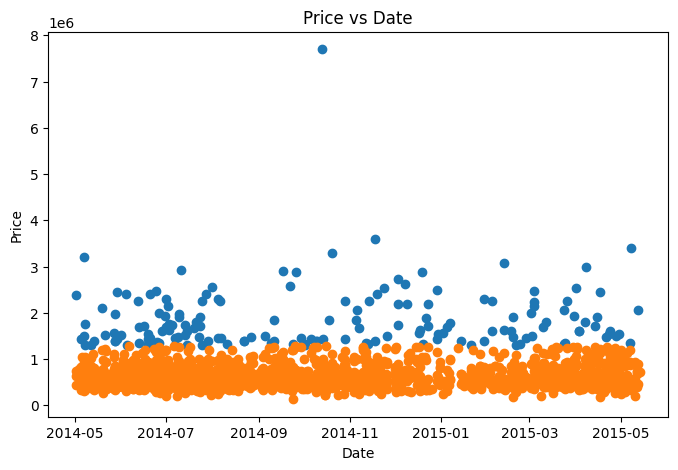

In [160]:
plt.scatter(highest_price_decile['date'], highest_price_decile['price'])
plt.scatter(other_nine_deciles['date'], other_nine_deciles['price'])
plt.xlabel('Date')  
plt.ylabel('Price')
plt.title('Price vs Date')



In [174]:
central_seattle_zipcodes_df[['price','sqft_living','grade', 'bathrooms','sqft_lot','bedrooms','condition', 'date']].corr(method='pearson')

,price,sqft_living,grade,bathrooms,sqft_lot,bedrooms,condition,date
price,1.000,0.830,0.707,0.552,0.544,0.417,0.232,0.003
sqft_living,0.830,1.000,0.665,0.670,0.541,0.621,0.251,-0.030
grade,0.707,0.665,1.000,0.603,0.245,0.302,0.058,-0.045
bathrooms,0.552,0.670,0.603,1.000,0.198,0.475,0.073,-0.048
sqft_lot,0.544,0.541,0.245,0.198,1.000,0.315,0.227,-0.024
bedrooms,0.417,0.621,0.302,0.475,0.315,1.000,0.179,0.005
condition,0.232,0.251,0.058,0.073,0.227,0.179,1.000,-0.142
date,0.003,-0.030,-0.045,-0.048,-0.024,0.005,-0.142,1.000


## Findings:
* living area matters the most: all houses with a living area greater than 4610 sqft are among the highest priced ones, below 4000 sqft the living area seems not as important as other factors

* grades: if the grade is ten or higher it is likely that the house will sell at a high price

* number of bathrooms: if the house has more than 3.75 bathrooms it is more likely to sell for a high price (although the most prevelant number of bathrooms high selling houses is three)

* lot area: the bigger the lot, the higher the price (although there are exception to this)

* number of bedrooms: if the house has seven or more bedrooms it is likely to sell for a higher price, although most of the high selling houses have only four bedrooms

* condition: does effect the price, but not as much as other factors

* date: does not seem to effect the prices

* waterfront: does not seem to effect the prices, although all the waterfront houses were high selling ones, but only less than ten percent of high priced houses had a waterfront

* zipcode: does effect the chance of the house beeing a high selling on, as around one in three houses with the zipcode 98112 had a selling price among the top 10 % of prices, making up almost have of that category.

* view: does not effect the selling price

* number of floors: does not effect the selling price

* year built: does not effect the selling price

* renovations: do not seem to effect the selling price

In [177]:
smaller_high_selling_houses = highest_price_decile[highest_price_decile['sqft_living'] < 46100]
smaller_high_selling_houses.describe()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,163,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000,...,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000,163.000
mean,2014-10-14 04:42:41.963190272,1851901.840,3859140287.239,4.160,3.199,3766.025,7616.853,2.058,0.018,1.129,...,9.748,2927.742,822.331,1944.086,257.877,98116.405,47.623,-122.316,2922.025,6411.601
min,2014-05-02 00:00:00,1300000.000,148000475.000,2.000,1.000,1670.000,1880.000,1.000,0.000,0.000,...,7.000,1470.000,0.000,1900.000,0.000,98102.000,47.560,-122.409,1100.000,1378.000
25%,2014-07-03 00:00:00,1430000.000,1337800735.000,4.000,2.500,3020.000,4960.000,2.000,0.000,0.000,...,9.000,2360.000,345.000,1910.000,0.000,98112.000,47.619,-122.350,2360.000,4800.000
50%,2014-10-01 00:00:00,1630000.000,3232200085.000,4.000,3.250,3600.000,6480.000,2.000,0.000,0.000,...,10.000,2720.000,880.000,1927.000,0.000,98112.000,47.630,-122.303,2940.000,6000.000
75%,2015-01-17 12:00:00,2170000.000,5700003635.000,5.000,3.750,4270.000,8360.000,2.000,0.000,2.000,...,10.000,3365.000,1210.000,1979.500,0.000,98119.000,47.634,-122.287,3450.000,8000.500
max,2015-05-13 00:00:00,7700000.000,9831200520.000,8.000,8.000,12050.000,43838.000,3.500,1.000,4.000,...,13.000,8570.000,3480.000,2015.000,2014.000,98144.000,47.654,-122.279,4510.000,12620.000
std,NaN,682907.322,2704000049.492,1.030,0.875,1206.127,5273.678,0.439,0.135,1.475,...,1.020,934.000,594.673,39.042,672.653,10.840,0.020,0.036,739.984,2186.512


{'whiskers': [<matplotlib.lines.Line2D at 0x19a2fbf4d90>,
 'caps': [<matplotlib.lines.Line2D at 0x19a319113d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a318ff350>],
 'medians': [<matplotlib.lines.Line2D at 0x19a319122d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a2fc18610>],
 'means': []}

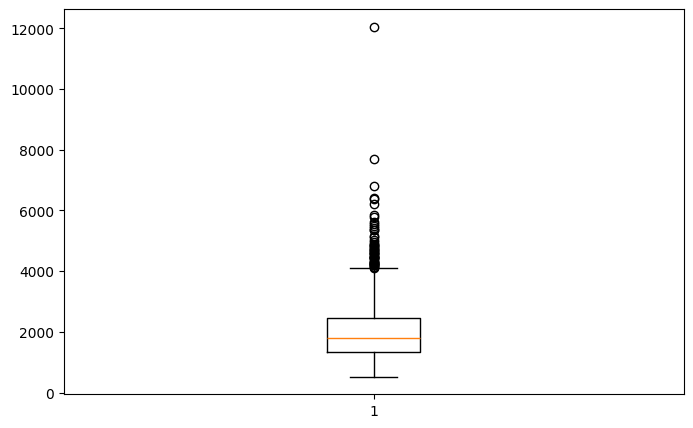

In [178]:
plt.boxplot(central_seattle_zipcodes_df['sqft_living'])

{'whiskers': [<matplotlib.lines.Line2D at 0x19a2fc0da10>,
 'caps': [<matplotlib.lines.Line2D at 0x19a2fc0cad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a2fcb7650>],
 'medians': [<matplotlib.lines.Line2D at 0x19a2fcd1290>],
 'fliers': [<matplotlib.lines.Line2D at 0x19a2fcd0c10>],
 'means': []}

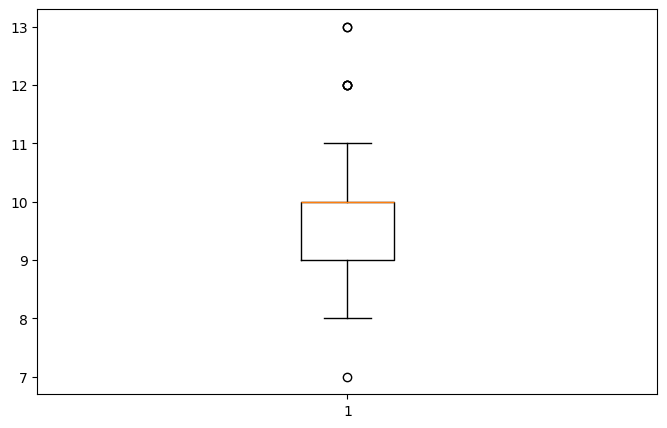

In [194]:
plt.boxplot(highest_price_decile['grade'])

In [191]:
#correlation matrix for the highest price decile for the most important factors
sqft_without_outliers = highest_price_decile.query('sqft_living < 4000 and sqft_lot < 10000')   
sqft_without_outliers[['price','sqft_lot','sqft_living','grade', 'bathrooms']].corr(method='pearson')

,price,sqft_lot,sqft_living,grade,bathrooms
price,1.000,0.379,0.316,0.311,0.152
sqft_lot,0.379,1.000,0.165,0.104,-0.049
sqft_living,0.316,0.165,1.000,0.356,0.502
grade,0.311,0.104,0.356,1.000,0.260
bathrooms,0.152,-0.049,0.502,0.260,1.000


# Buying a House in the Outskirts

[All zipcodes of Seattle](https://www.zip-codes.com/city/wa-seattle.asp)

In [198]:
#selecting all the zipcodes which are not a part of seattle
results_in = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98110, 98111, 98112, 98113, 98114, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98124, 98125, 98126, 98127, 98129, 98131, 98133, 98134,98136, 98138, 98139, 98141, 98144, 98145, 98146, 98148, 98154, 98155, 98158, 98160, 98161, 98164, 98165, 98166, 98168, 98170, 98174, 98175, 98177, 98178, 98179, 98181, 98184, 98185, 98188, 98190, 98191, 98194, 98195, 98198, 98199]
seattle_zip_codes = df[df['zipcode'].isin(results_in)]
suburb_zip_codes = seattle_zip_codes[~seattle_zip_codes['zipcode'].isin(central_seattle_zipcodes)]
suburb_zip_codes.describe()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,7344,7344.000,7344.000,7344.000,7344.000,7344.000,7344.000,7344.000,7344.000,7344.000,...,7344.000,7344.000,7344.000,7344.000,7344.000,7344.000,7344.000,7344.000,7344.000,7344.000
mean,2014-10-30 03:43:20,485896.515,4543141936.529,3.157,1.841,1747.769,6956.177,1.404,0.009,0.284,...,7.226,1409.152,332.135,1955.968,91.808,98136.381,47.615,-122.333,1643.775,6635.405
min,2014-05-02 00:00:00,78000.000,1200019.000,1.000,0.500,370.000,572.000,1.000,0.000,0.000,...,4.000,370.000,0.000,1900.000,0.000,98103.000,47.343,-122.416,460.000,651.000
25%,2014-07-23 00:00:00,319000.000,2291400341.750,3.000,1.000,1210.000,4182.000,1.000,0.000,0.000,...,7.000,1020.000,0.000,1937.000,0.000,98115.000,47.526,-122.365,1330.000,4409.000
50%,2014-10-20 00:00:00,425000.000,3992700530.000,3.000,1.750,1590.000,6048.000,1.000,0.000,0.000,...,7.000,1280.000,0.000,1951.000,0.000,98126.000,47.660,-122.337,1550.000,6048.000
75%,2015-02-18 00:00:00,575775.000,7174800260.500,4.000,2.500,2130.000,8190.000,2.000,0.000,0.000,...,8.000,1630.000,660.000,1973.000,0.000,98155.000,47.696,-122.300,1860.000,8100.000
max,2015-05-27 00:00:00,4500000.000,9900000190.000,33.000,6.750,8670.000,137214.000,3.500,1.000,4.000,...,13.000,7880.000,2610.000,2015.000,2015.000,98199.000,47.778,-122.220,4410.000,128066.000
std,NaN,278893.924,2777144916.308,1.037,0.764,751.923,5723.508,0.577,0.092,0.835,...,0.952,579.988,422.776,29.943,418.027,29.869,0.106,0.041,463.659,4546.519
